KNN K nearest neighbour

In [1]:
import pandas as pd

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df['target']=iris.target

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df0 = df[df.target == 0]

In [14]:
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [15]:
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

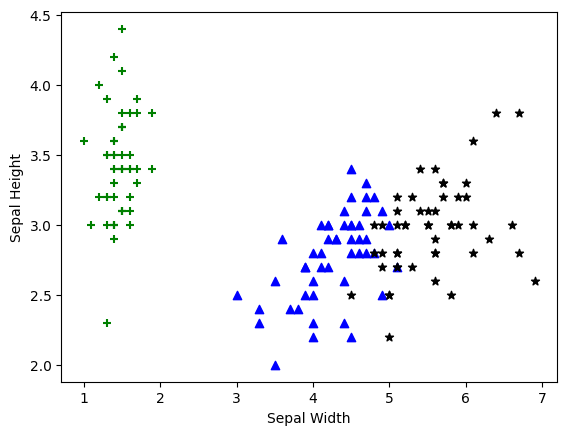

In [19]:
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Height")
plt.scatter(df0['petal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['sepal width (cm)'],color='blue',marker='^')
plt.scatter(df2['petal length (cm)'],df2['sepal width (cm)'],color='black',marker='*')

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop('target',axis=1)
y = df.target

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=1)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=3)

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
knn.score(X_test,y_test)

1.0

In [29]:
knn2 = KNeighborsClassifier(n_neighbors=10)

In [31]:
knn2.fit(X_train,y_train)
knn2.score(X_test,y_test)

0.9666666666666667

In [36]:
y_predicted = knn2.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix

In [37]:
cn = confusion_matrix(y_test,y_predicted)

In [38]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'Truth')

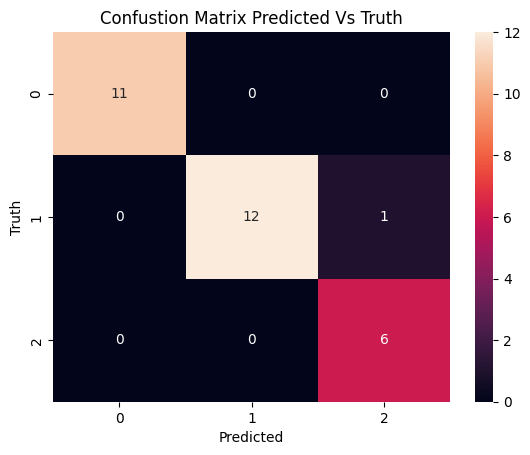

In [43]:

sns.heatmap(cn,annot=True)
plt.title("Confustion Matrix Predicted Vs Truth")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [44]:
from sklearn.metrics import classification_report

In [46]:
clr = classification_report(y_test,y_predicted)
print(clr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



From sklearn.datasets load digits dataset and do following

    1.Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that <br/>gives you a maximum score. You can manually try different values of K or use gridsearchcv
    2.Plot confusion matrix
    3.Plot classification report